In [1]:
include("preparation.jl");
include("bayes.jl");
include("simulation.jl");

# Simulation and Plot のまとめ

Plotのmethodは以下。()内はmethod名。
- 州ごとにmunicipalityを候補者二人の得票率を軸とした六つの散布図にプロットする(candcand)
- 州ごとにmunicipalityの結果を集計し、時系列データとして候補者ごとの得票率をプロットする(state_vote)
- 州ごとにmunicipalityを、縦軸を候補者を合算した投票率とした散布図にプロットする。玉の大きさで別の指標も観れるようにする。プロットするのは、「横軸を白人/非白人比率、玉の大きさをkerryの得票率」、「横軸をoverba/それ以外の比率、玉の大きさをkerryの得票率」、「横軸を20000以下、玉の大きさをkerryの得票率」の3種類で、それぞれ7,5の35プロットを一枚の画像にする。(demo)
- すべてのmunicipalityの投票率をヒストグラムで表示(rate_histo)

simulation typeで実装し、methodでsimulationの結果に対する上記のplotを出せるようにしている。

引数の詳細はsimulation.jlの各methodの定義部分に記載

確認する点は以下
- Candidateのdemographic parameter に大きい値を入れてみる。値を大きくしたcandidateのvote shareが高まるかを確認
- Costのparameter を大きくすることでturn outがどれだけ上がるかを確認
- Tijを変化させた結果を、州ごとにmunicipalityを二人組ずつ散布図で確認。とりあえず4人の候補者がいる特定の州について(Tijが6つのパラメータ)、パラメータの値を大きくして見る。その際、Vstrの値を事前に確認して、変化するべき方向を見極めておく。パラメータは一つずつ変化させる。


### 設定できるパラメータは以下のとおり

```
FAlph = Array(Float64, 2, 1)
# setting parameters
param[2] = -1
C0 = 0
# Raceの変更に伴い、Cxも4つの要素にする必要がある。
q = 4
Cx = param[1:q]
Cz = -abs(param[q+1:q+3])
FAlph[1,1] = abs(param[q+4])
FAlph[2,1] = abs(param[q+5])
param[q+4:q+5] = FAlph[1:2,1]
Sig_xsi  = max(0.5, abs(param[q+6]))
param[q+6] = Sig_xsi
DeltaO  = 0.6891
DeltaMO = 0.5366
# Raceをいじった関係でこのvkを4*4 = 16この要素にしなくちゃいけない
vk = param[12:27]
composite = param[75:149]
Tij = abs(param[150:260])

# new parameters
# rho_eta = abs(param[261])
rho_eta = 1
rho_chi = param[262:265]
mu_chi = param[266:269]
chi = param[270:273]
```

In [2]:
# パラメータセットとインスタンスの作成
m = simulation(rand(273))

# simulationを実行
v = simulate(m)

full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in '

3020×4 Array{Float64,2}:
 0.0          0.0       0.0         0.336575   
 0.0          0.0       0.0         0.327785   
 0.0          0.0       0.0         0.358893   
 0.0          0.0       0.0         0.321791   
 0.0          0.0       0.0         0.351386   
 0.0          0.0       0.0         0.309306   
 0.0          0.0       0.0         0.316231   
 0.0          0.0       0.0         0.355108   
 0.0          0.0       0.0         0.348746   
 0.0          0.0       0.0         0.334231   
 0.0          0.0       0.0         0.353314   
 0.0          0.0       0.0         0.436407   
 0.0          0.0       0.0         0.543397   
 ⋮                                             
 0.00104257   0.779316  0.00905213  0.000107107
 0.000896566  0.77684   0.0136474   0.00012052 
 0.00196757   0.784681  0.0103918   9.22822e-5 
 0.00120721   0.789348  0.0093919   0.000107565
 0.000471379  0.748574  0.0101882   7.44477e-5 
 0.000464188  0.803197  0.00601342  7.32094e-5 
 0.00126297   0

## 各methodを使う

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::Ptr{

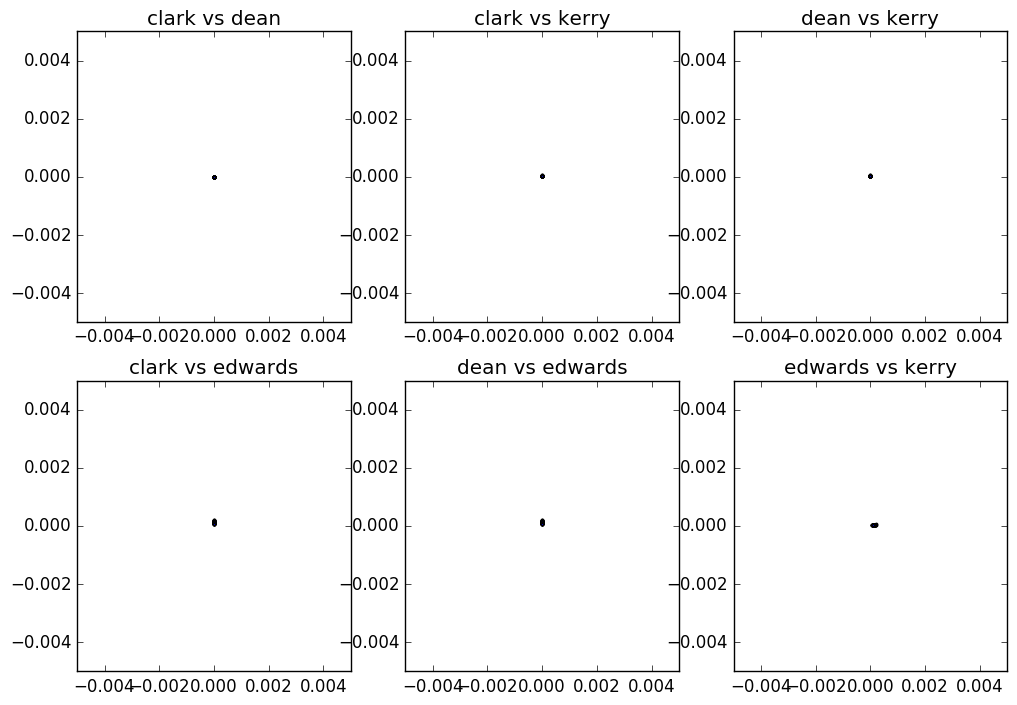

PyCall.PyObject_struct}) at ./deprecated.jl:770
 in transpose_f!(::Base.#transpose, ::Array{Ptr{PyCall.PyObject_struct},2}, ::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:369
 in transpose(::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:407
 in copy(::PyCall.PyArray{Ptr{PyCall.PyObject_struct},2}) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:337
 in convert(::Type{Array{Ptr{PyCall.PyObject_struct},N}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:453
 in convert(::Type{Array{PyCall.PyObject,N}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:484
 in (::PyCall.##8#9{DataType,PyCall.PyObject})(::Int64) at /Users/susu/.julia/v0.5/PyCall/src/conversions.jl:180
 in ntuple(::PyCall.##8#9{DataType,PyCall.PyObject}, ::Int64) at ./tuple.jl:65
 in convert(::Type{Tuple{PyPlot.Figure,Array{PyCall.PyObject,N}}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/conversions.jl:180
 in convert(::Type{PyCall.PyAny}, ::PyCall.PyObjec

In [5]:
# candcandの使用

# 第1引数がstate_number
# 第2引数がsimulated votehare
# どちらの引数も省略することが可能。
# 第1引数を省略するとすべての州についてのプロットを別々のファイルにして出力する。
# 第2引数を省略すると上のsimulate関数を実行してvote shareを糧に出してくれる。
candcand(m, 4, v)

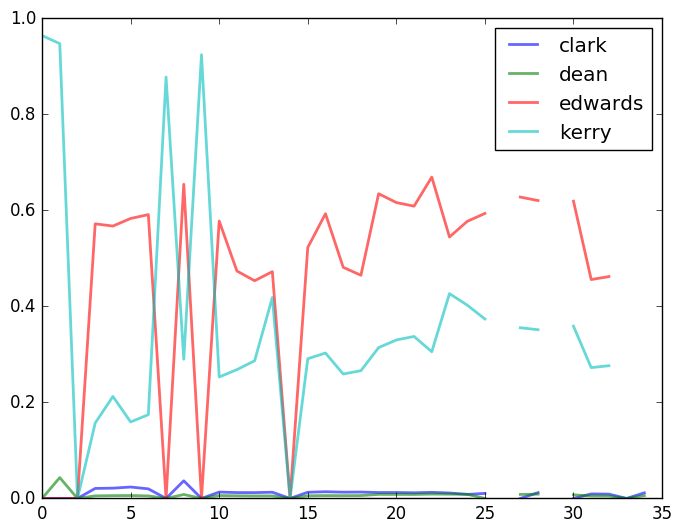

In [6]:
# state_voteの使用

# vはsimulated vote share
# 省略可能。
# 省略したら勝手にsimulateしてvote shareを入れてくれる。
state_vote(m, v)

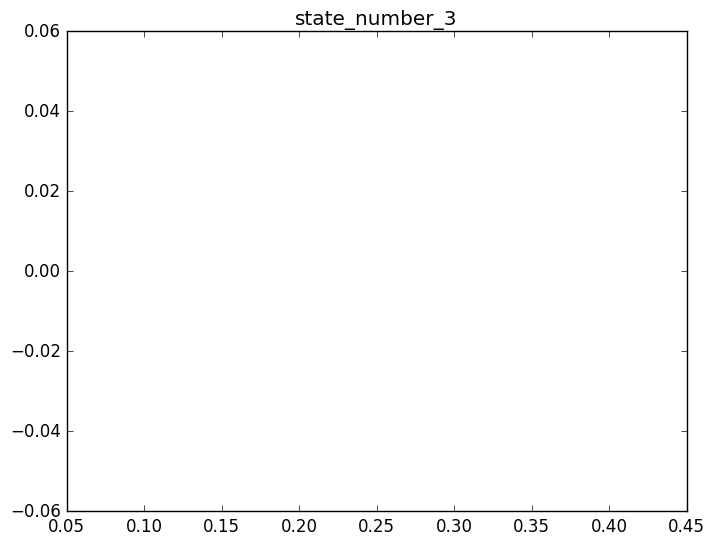

In [7]:
# demoの使用

# demographicの種類は省略不可能
# 第3引数はstate number。上と同様に省略可能
# 第4引数はsimulated vote share。上と同様に省略可能
demo(m, "race", 3, v)

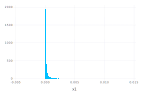

In [9]:
# rate_histoの使用
rate_histo(m, v)

## 変化の確認

### demographic parameterの変化

In [11]:

# 乱数でパラメータを作る
srand(12345)
para1 = rand(273)
srand(12345)
para2 = rand(273);

# vk = param[12:27]がdemographic
# 一番左の候補者についてパラメータをいじる(clark)
para1[12:15]　= para1[12:15]*5

# データシミュレーション
s1 = simulation(para1)
v1 = simulate(s1)
s2 = simulation(para2)
v2 = simulate(s2);

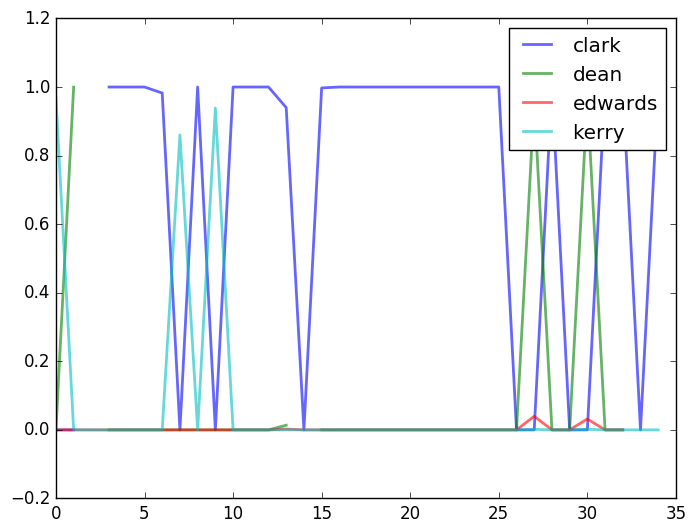

In [12]:
# clarkに投票したくなるはず
state_vote(s1, v1)

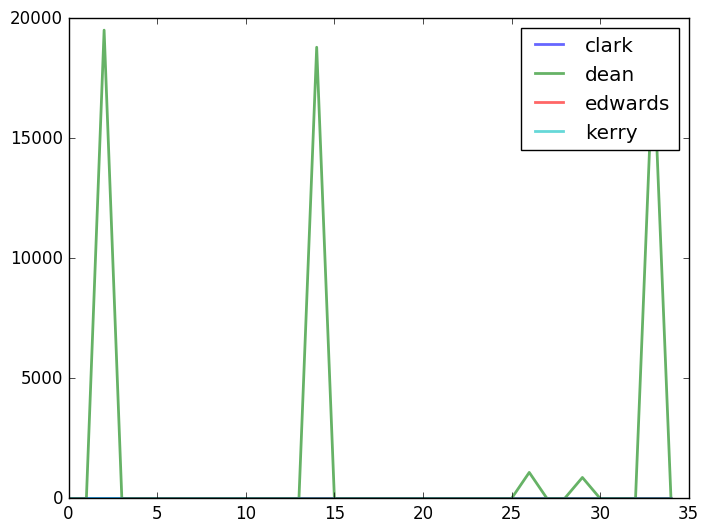

In [13]:
# 基準
state_vote(s2, v2)

### 選挙に行くコストを下げる

In [14]:
# まずはCxをいじる
srand(12345)
para1 = rand(273)
srand(12345)
para2 = rand(273)

q = 4
para1[1:q] = para1[1:q]*5
para1[2] = -1
para2[2] = -1

s3 = simulation(para1)
v3 = simulate(s3)
s4 = simulation(para2)
v4 = simulate(s4);

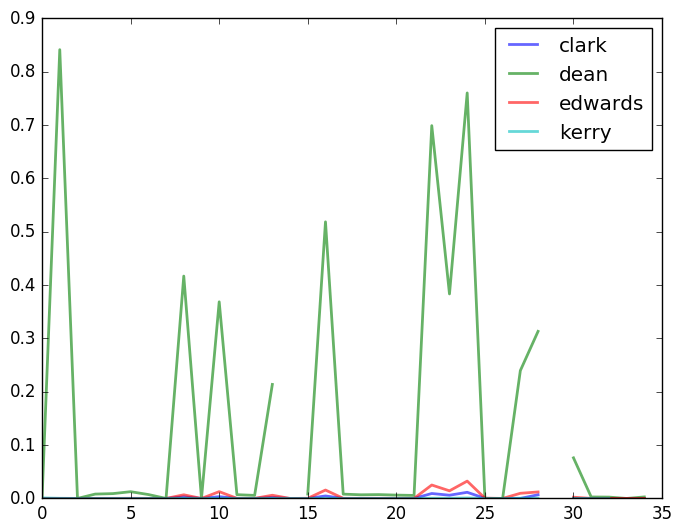

In [15]:
# いかなくなるはず
state_vote(s3, v3)

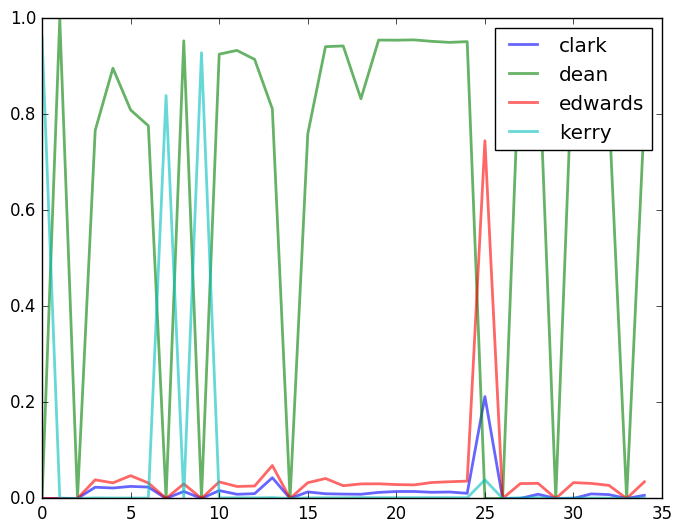

In [16]:
# 基準
# 下に対しても基準
state_vote(s4, v4)

In [20]:
# Czをいじる

# Cz = -abs(param[q+1:q+3])

srand(12345)
para1 = rand(273)

q = 4
para1[q+1:q+3] = para1[q+1:q+3]*5
para1[2] = -1

s5 = simulation(para1)
v5 = simulate(s5);

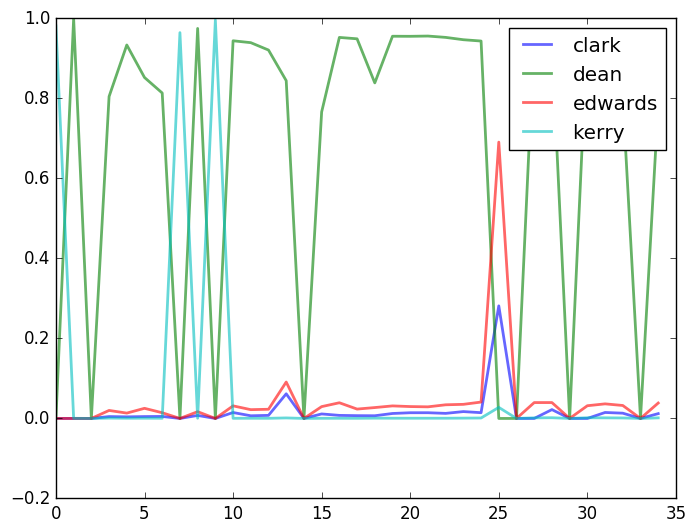

In [21]:
# 下がるはず
# ほとんど影響しない?
state_vote(s5, v5)

In [22]:
v5 == v4

false

### Tijの変化を見る 

In [12]:
# 候補者が4人いる州から一つ検証対象を抜き出す

# 以下で0になっている州が4人出ている州
for S in 1:size(Cand,1)
    println(S);
    println(sum(v[Cand[S, 14]:Cand[S, 15], :].==0.0));
end

1
201
2
132
3
18
4
0
5
0
6
0
7
0
8
225
9
0
10
108
11
0
12
0
13
0
14
0
15
9
16
0
17
0
18
0
19
0
20
0
21
0
22
0
23
0
24
0
25
0
26
56
27
17
28
93
29
0
30
154
31
67
32
0
33
0
34
12
35
0


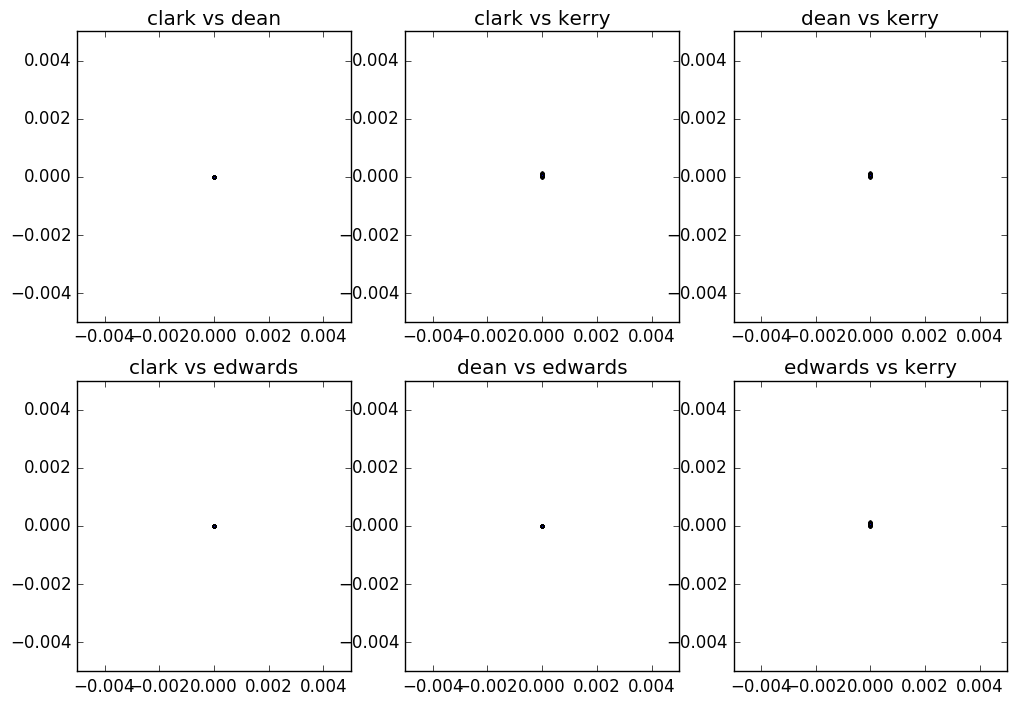

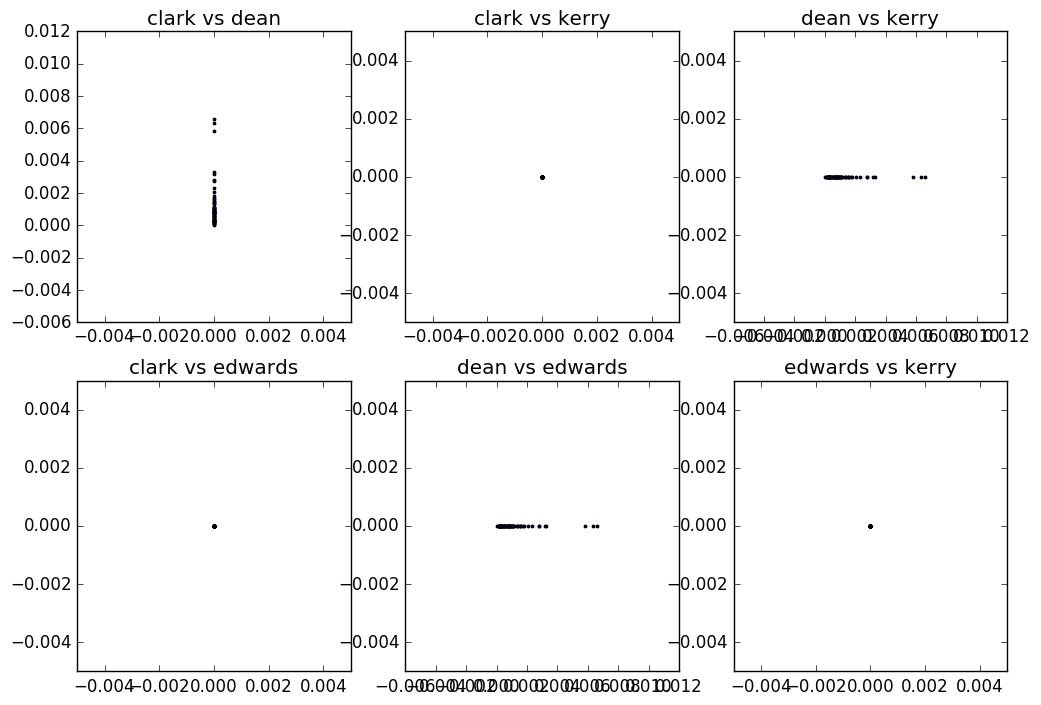

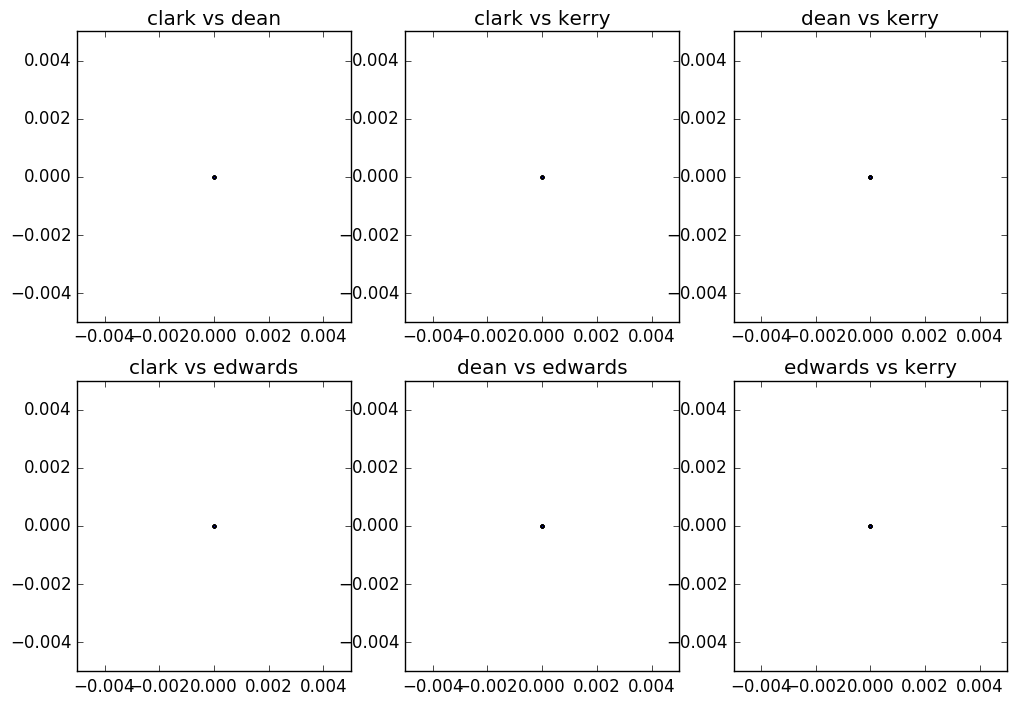

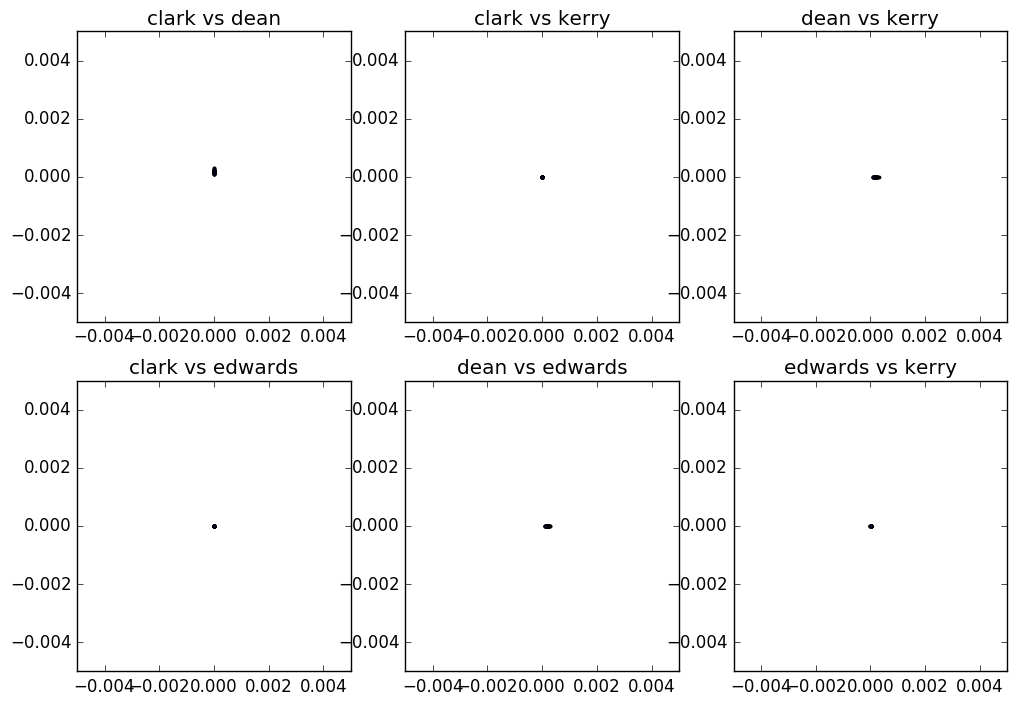

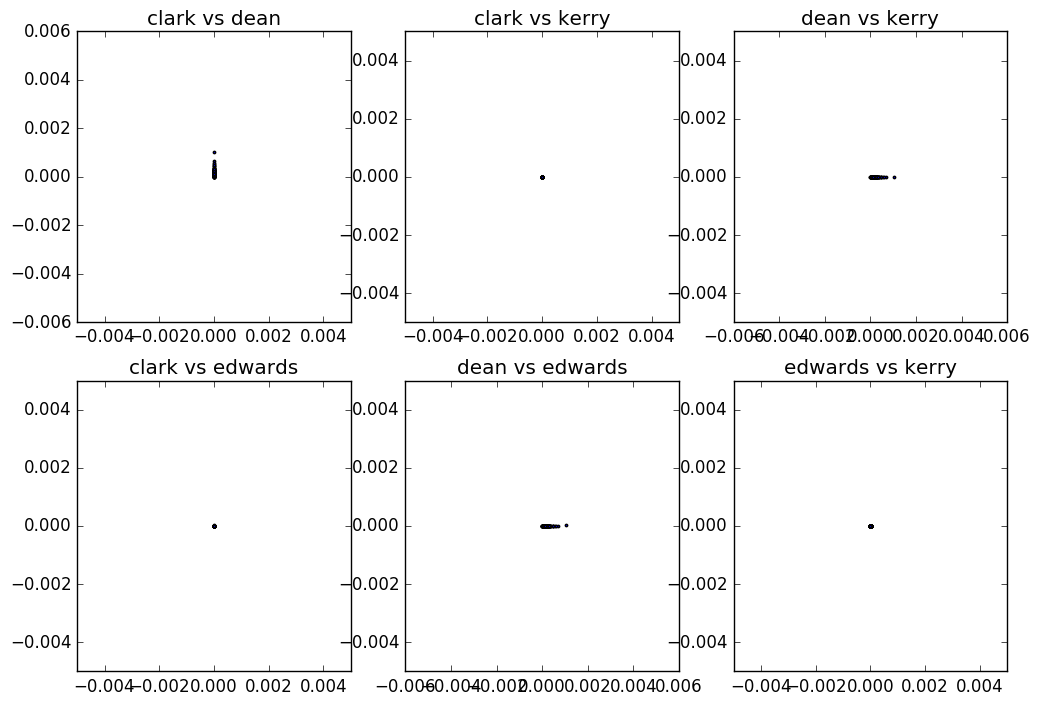

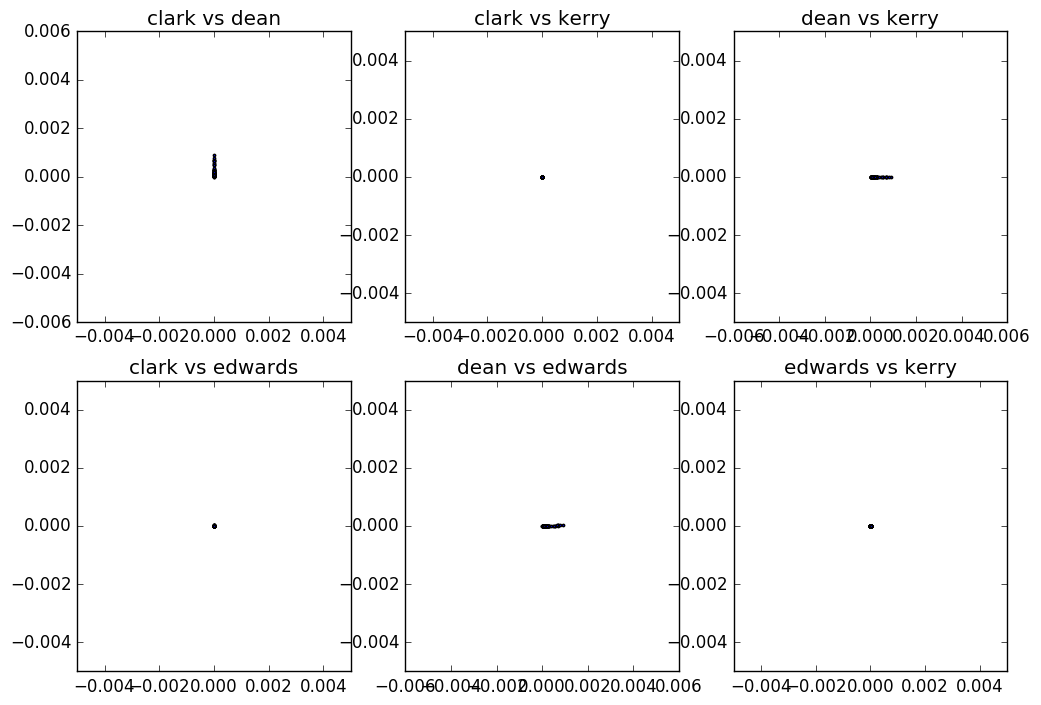

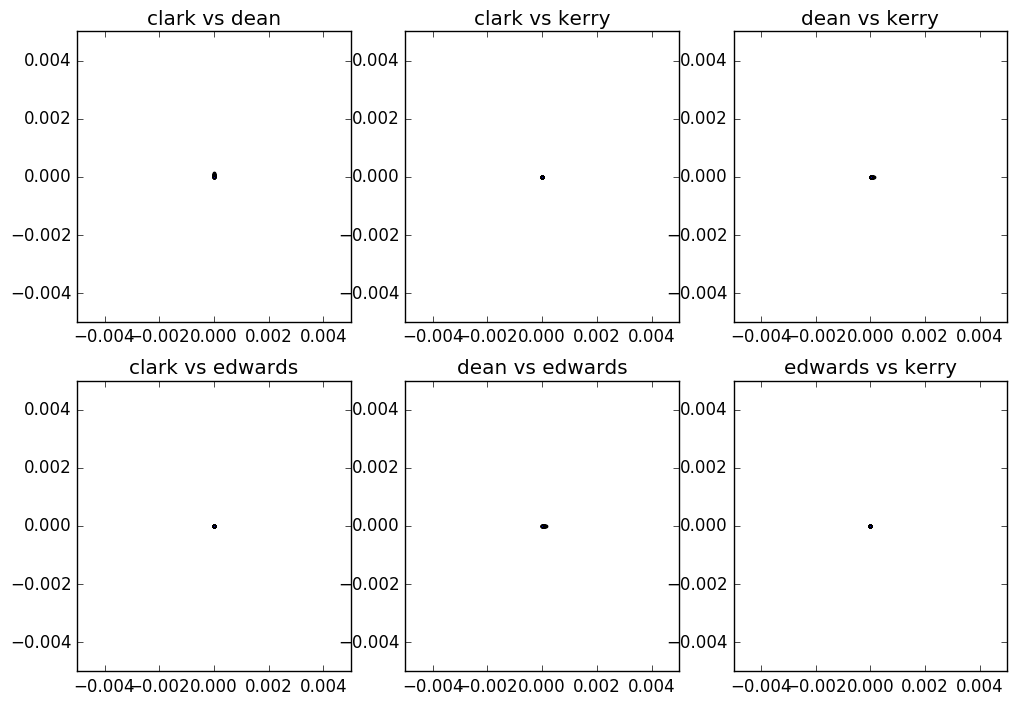

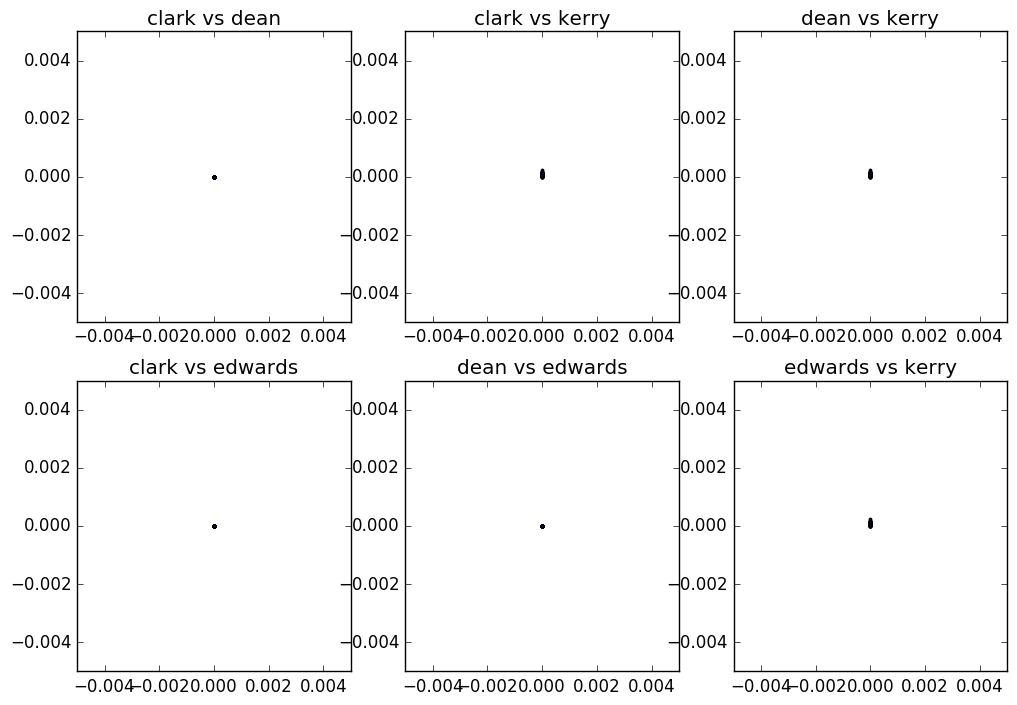

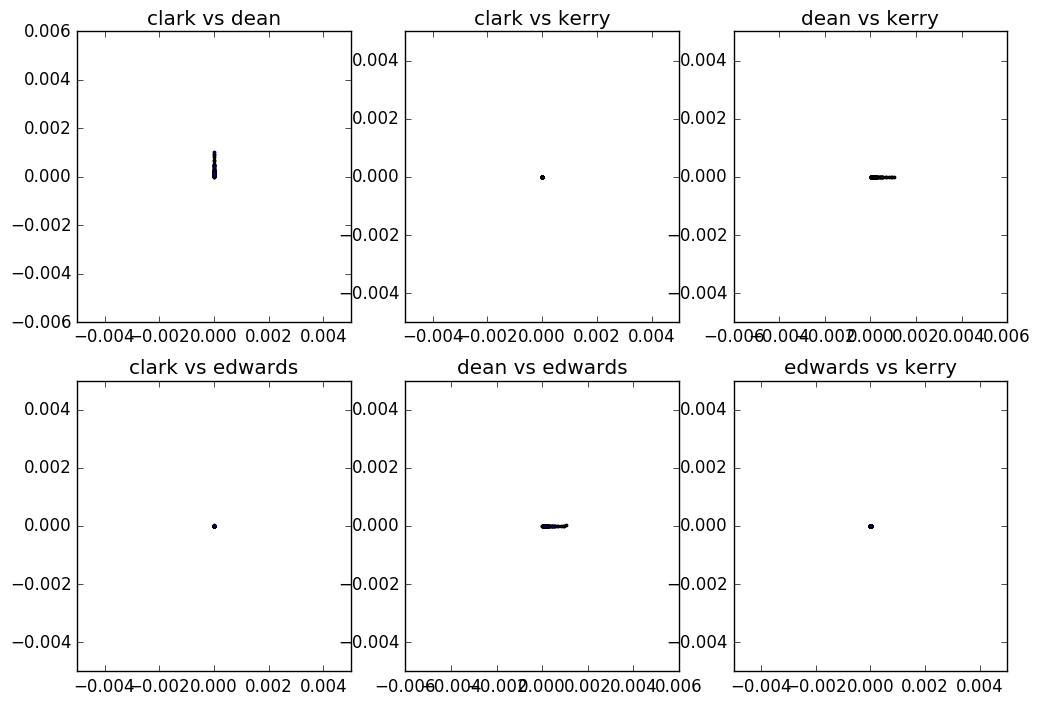

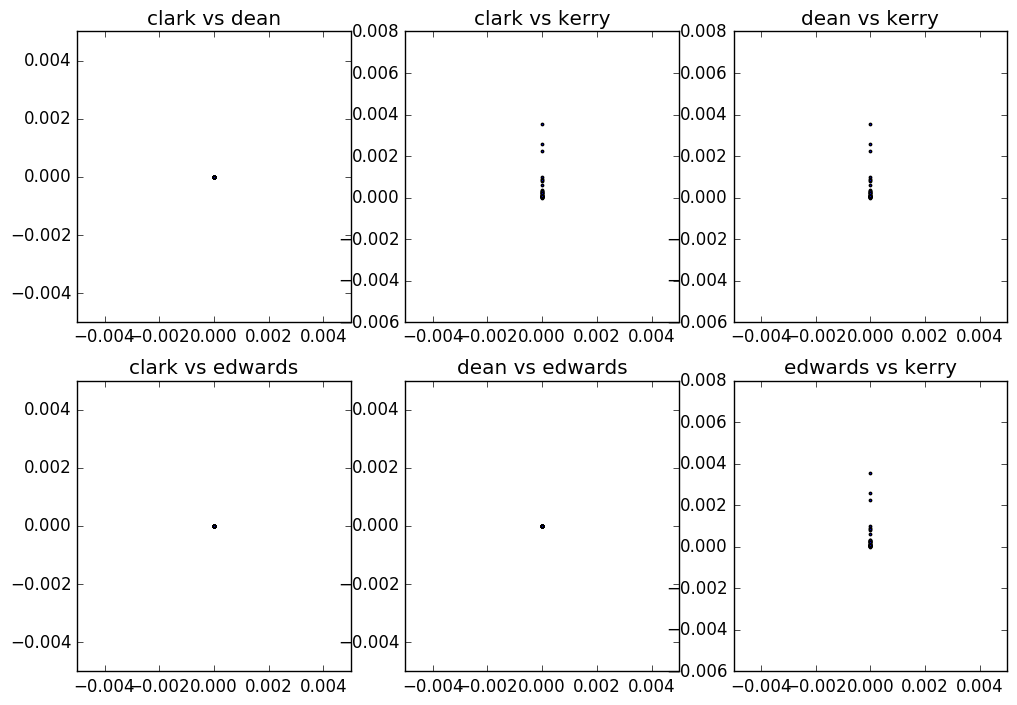

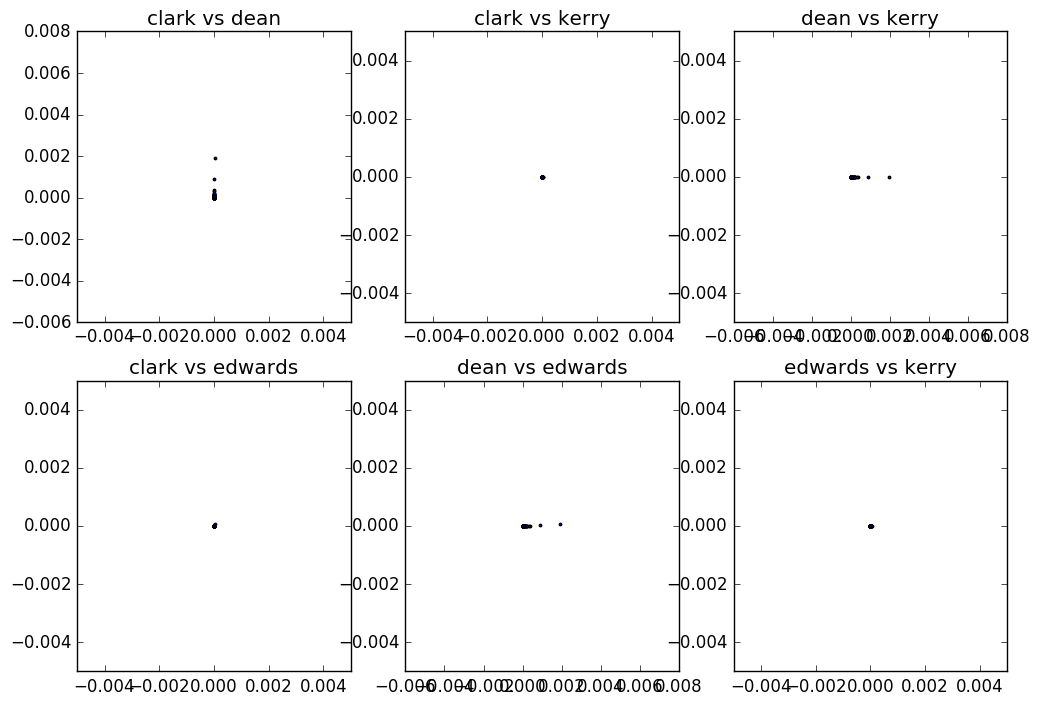

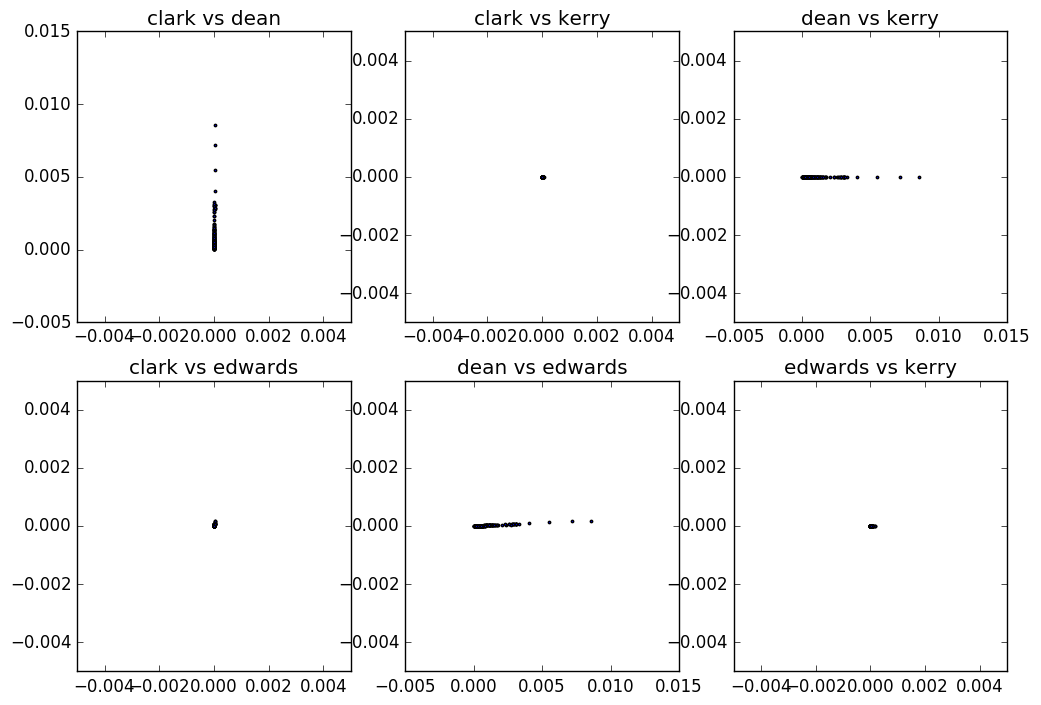

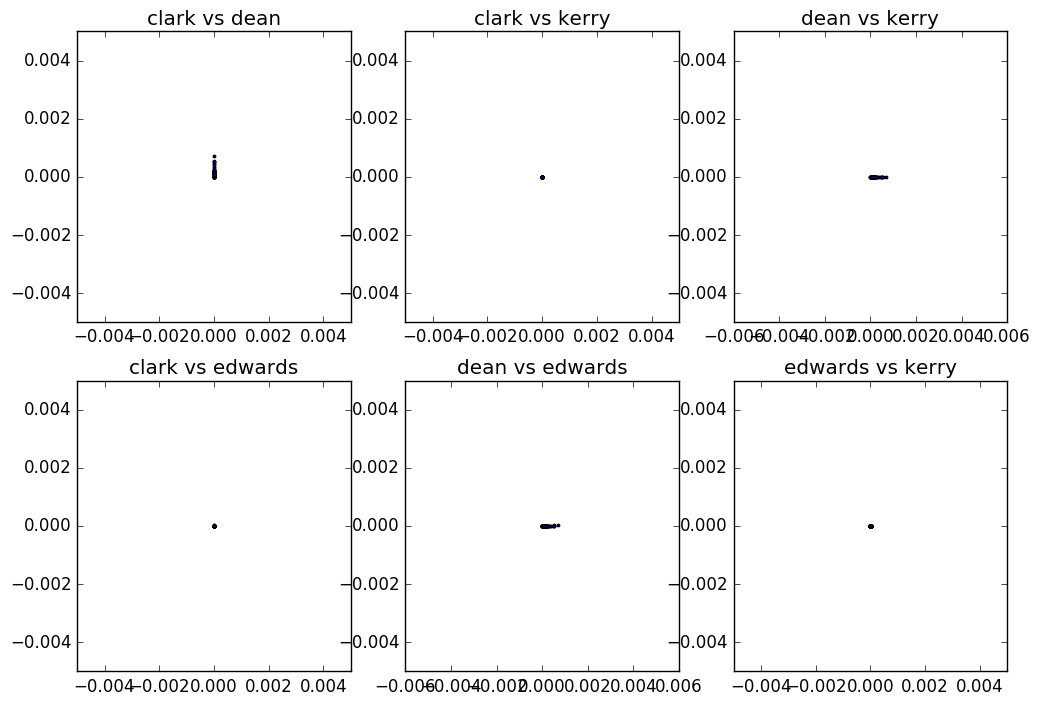

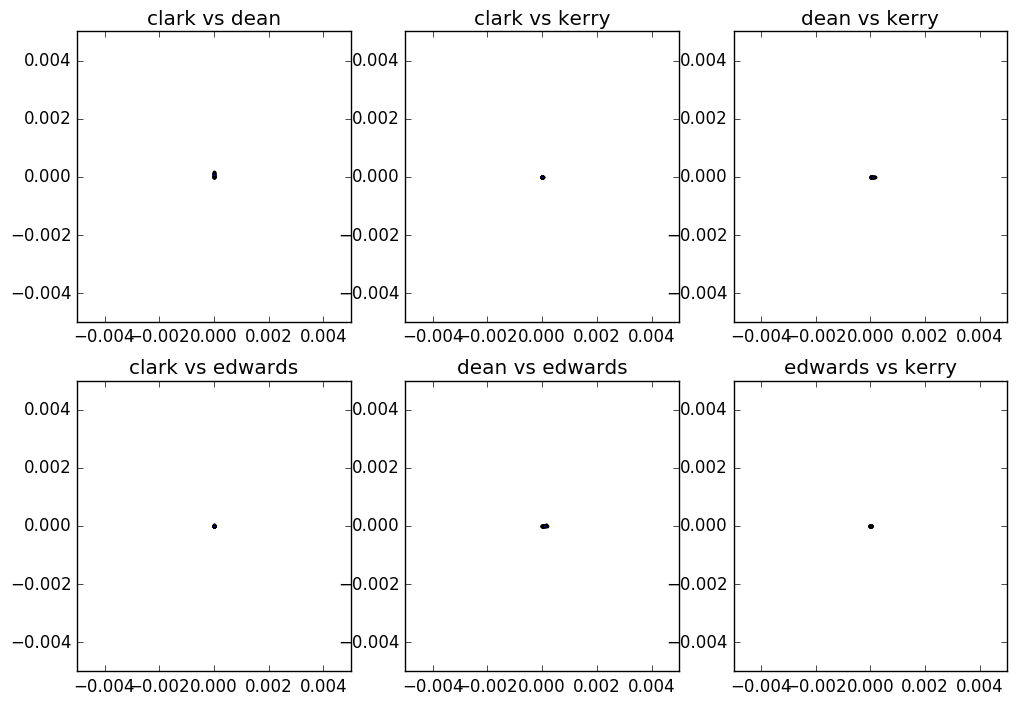

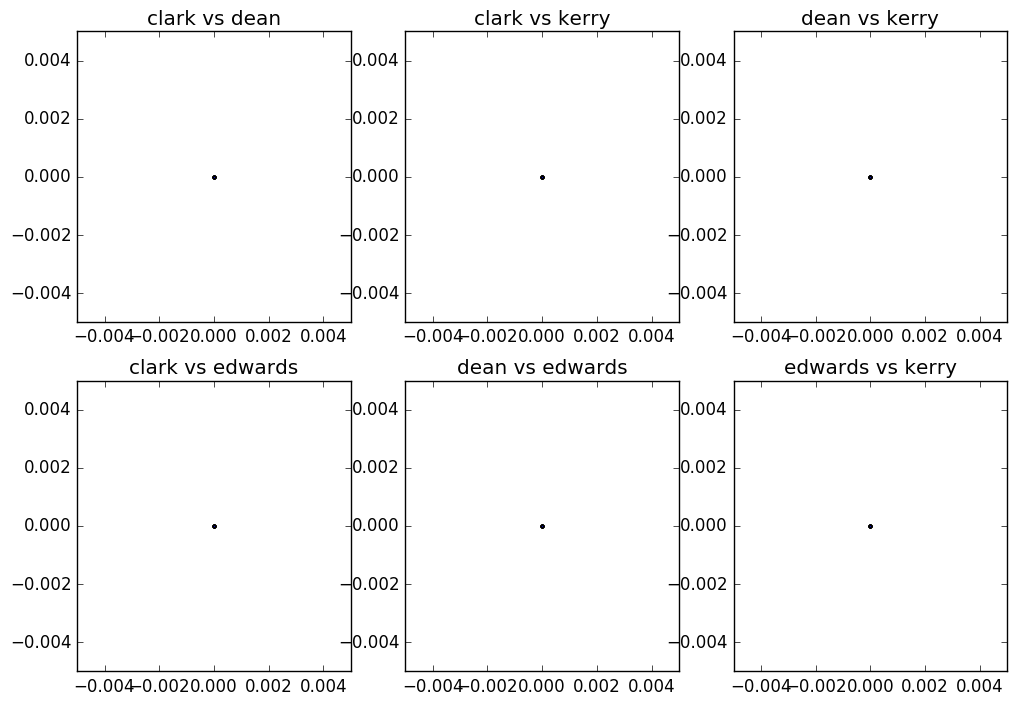

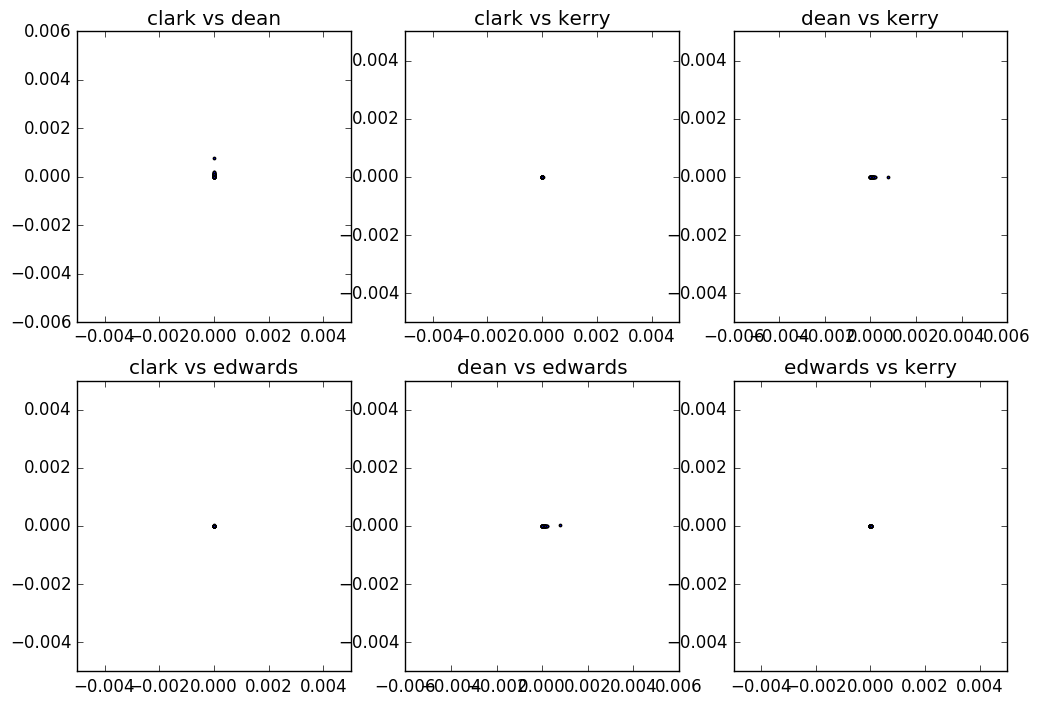

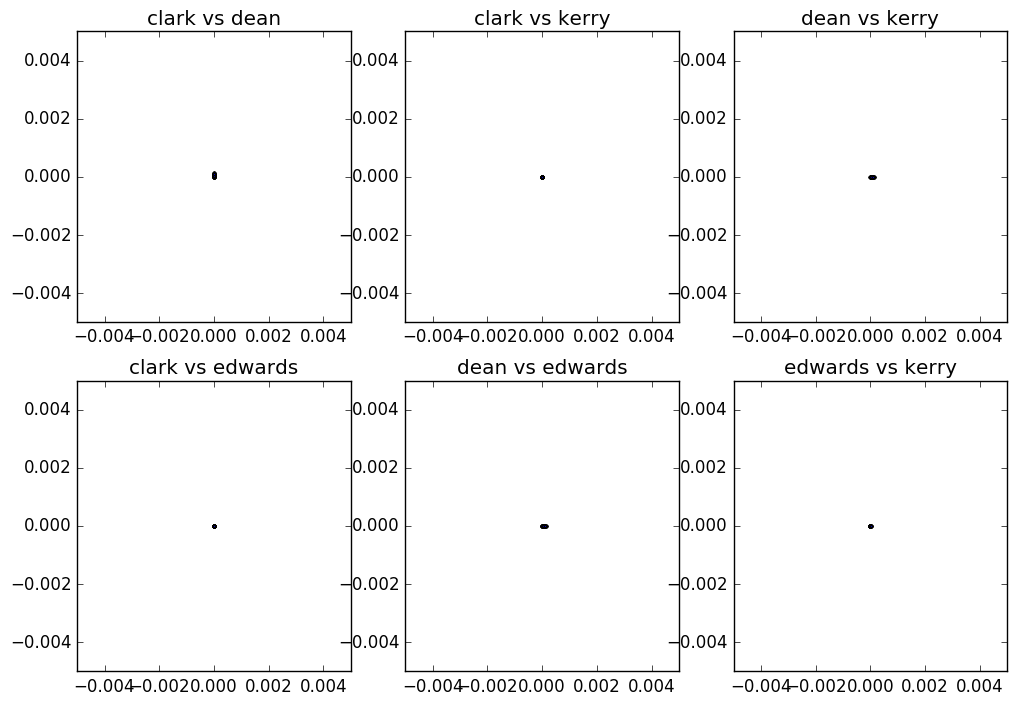

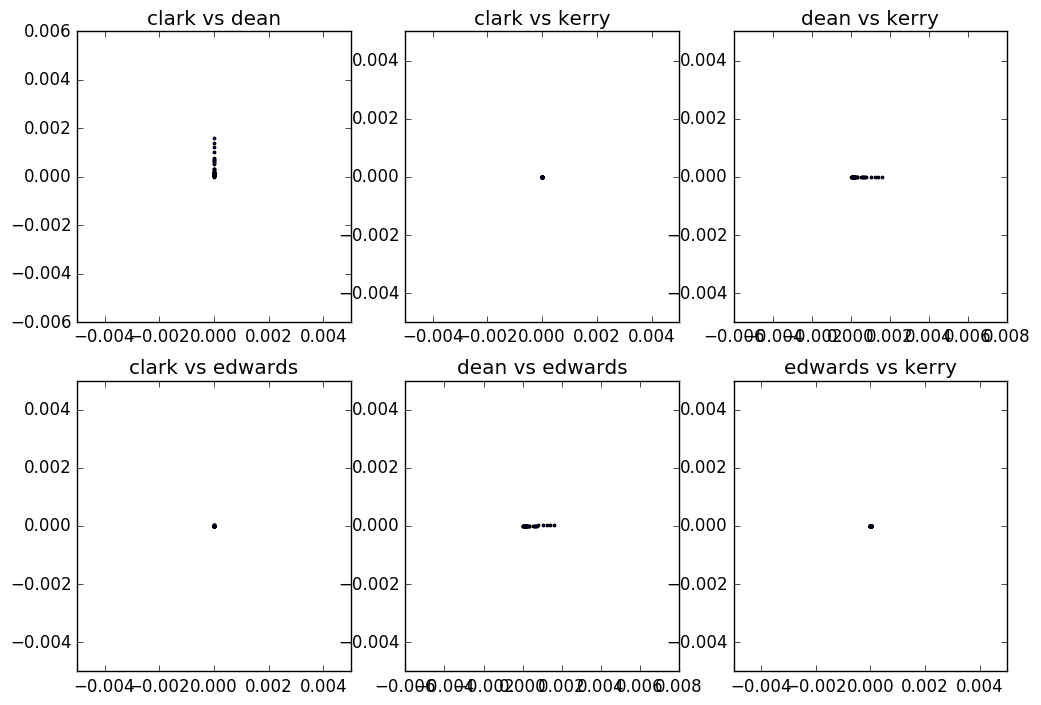

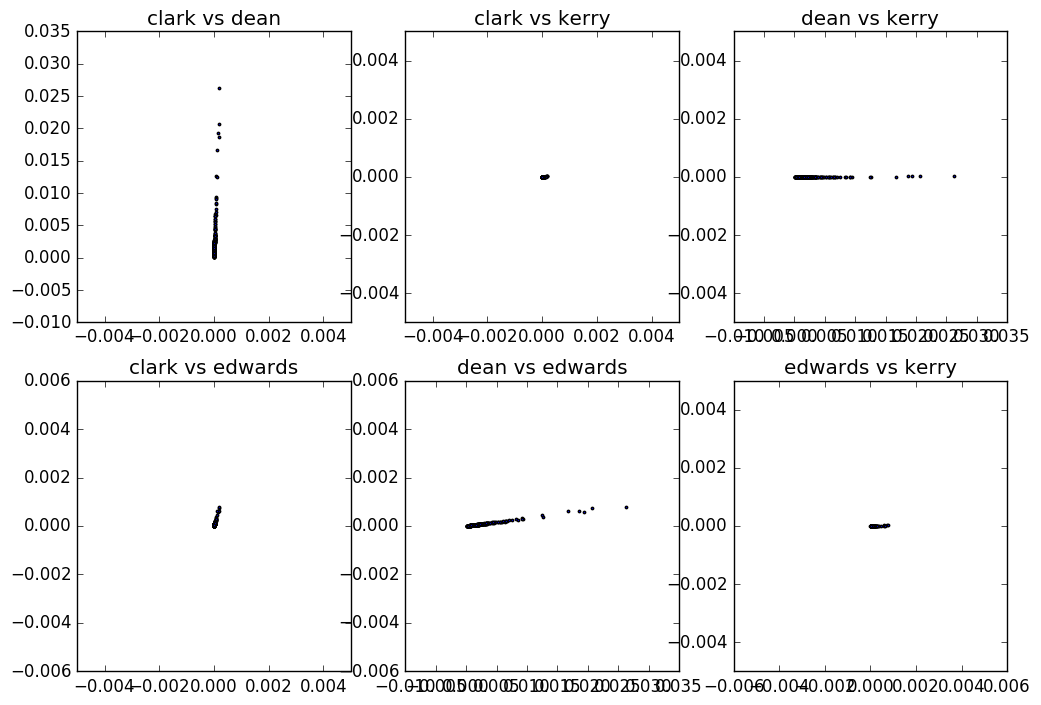

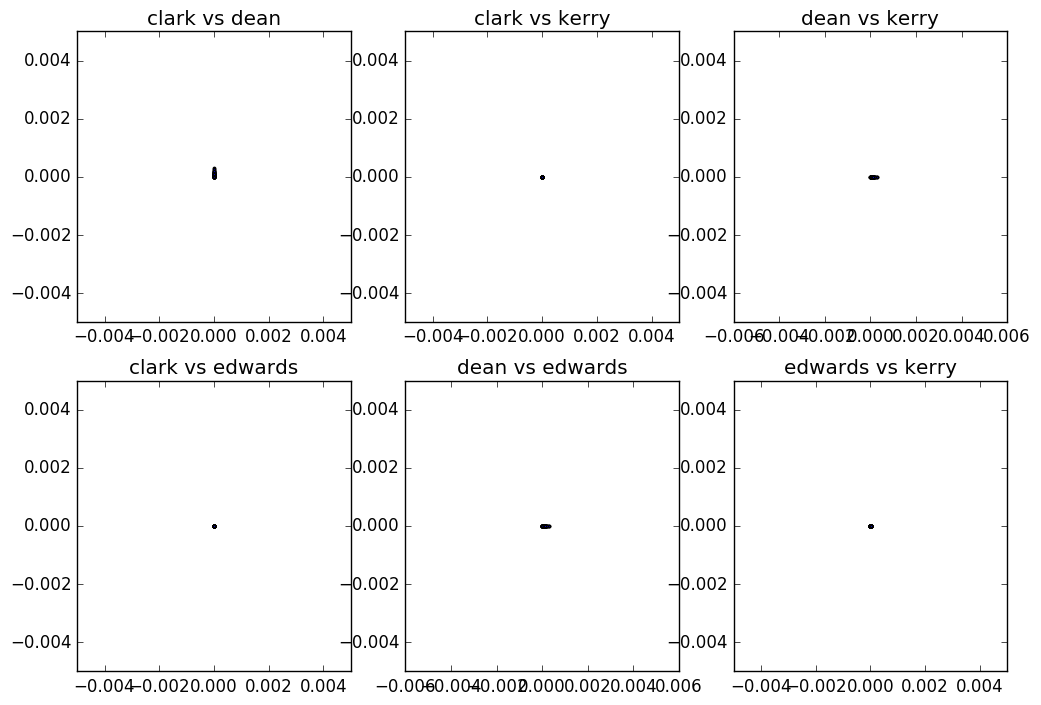

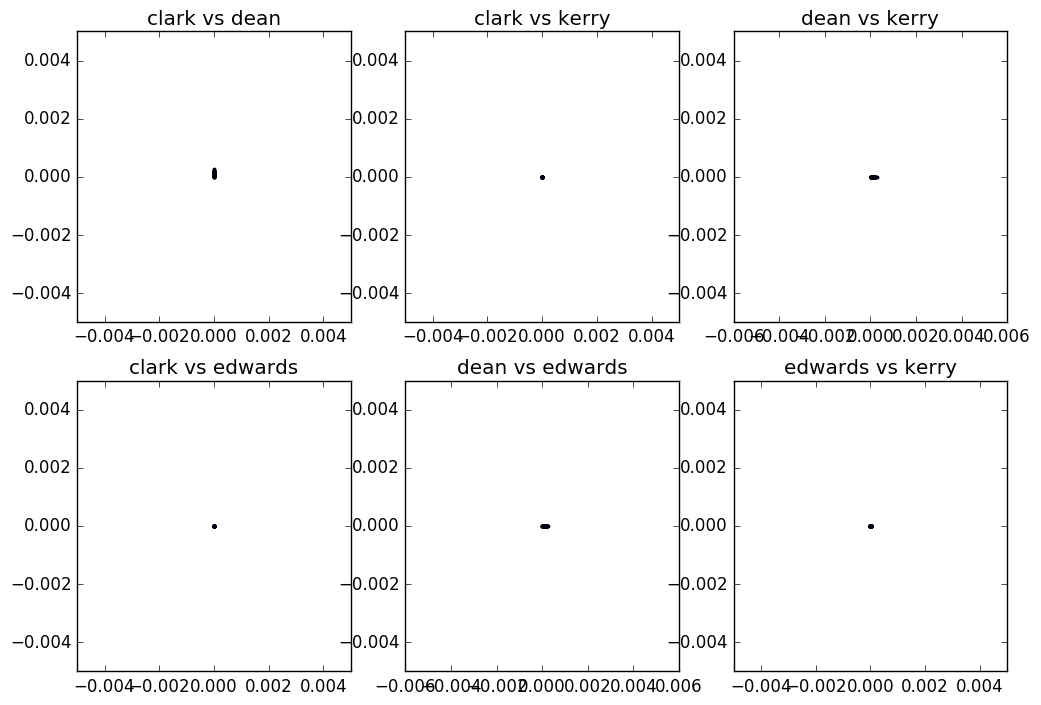

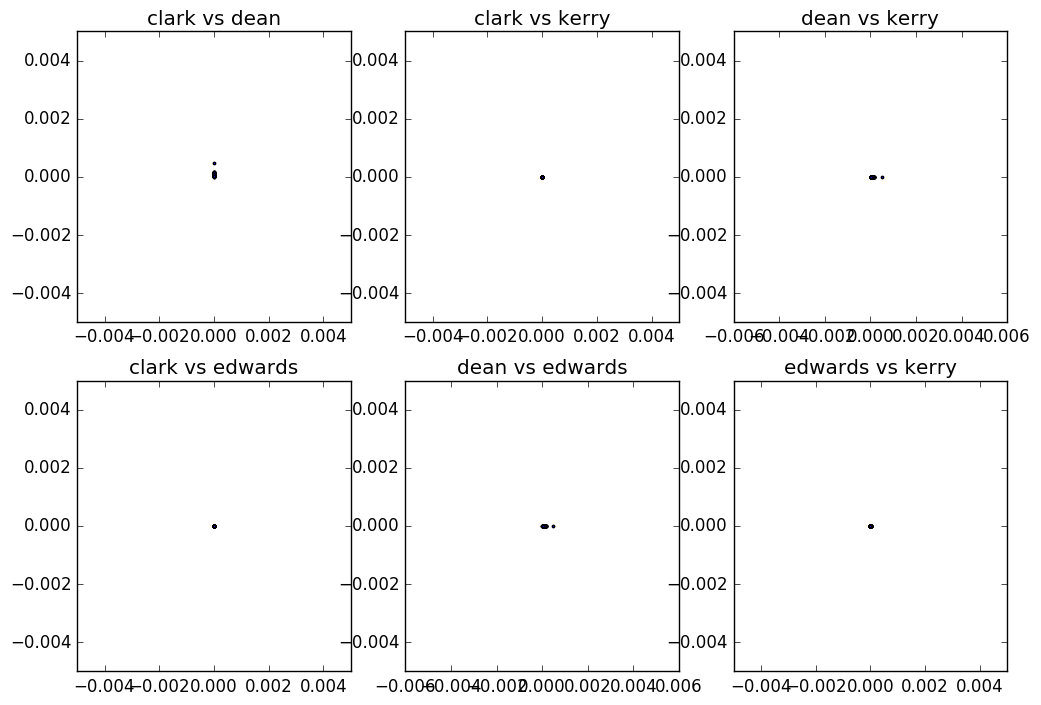

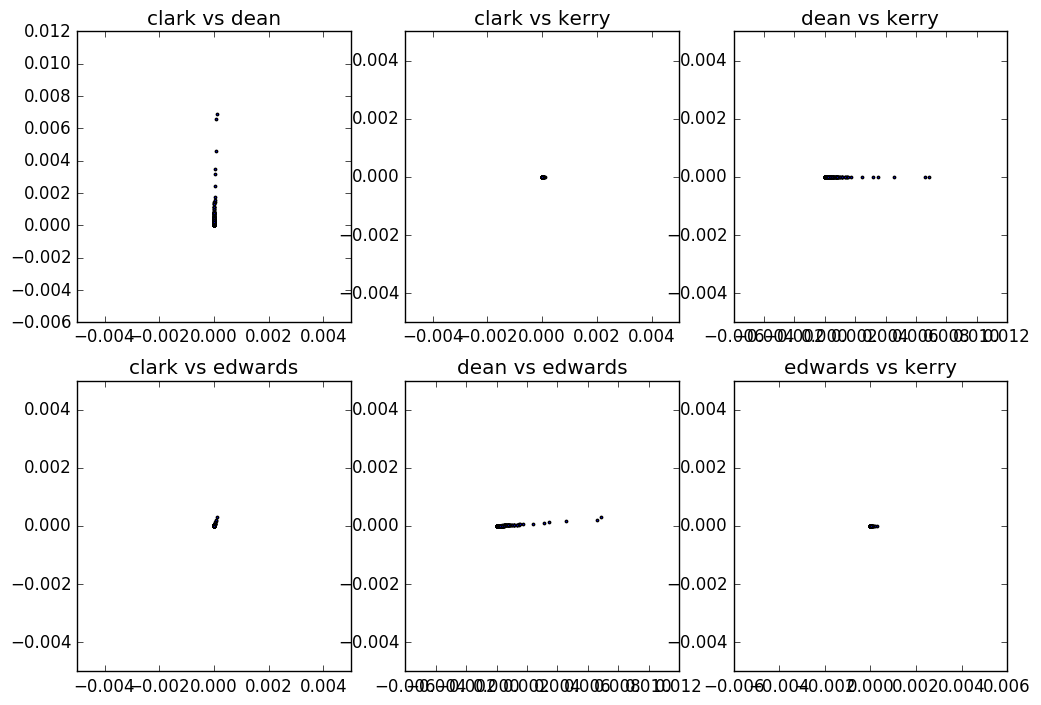

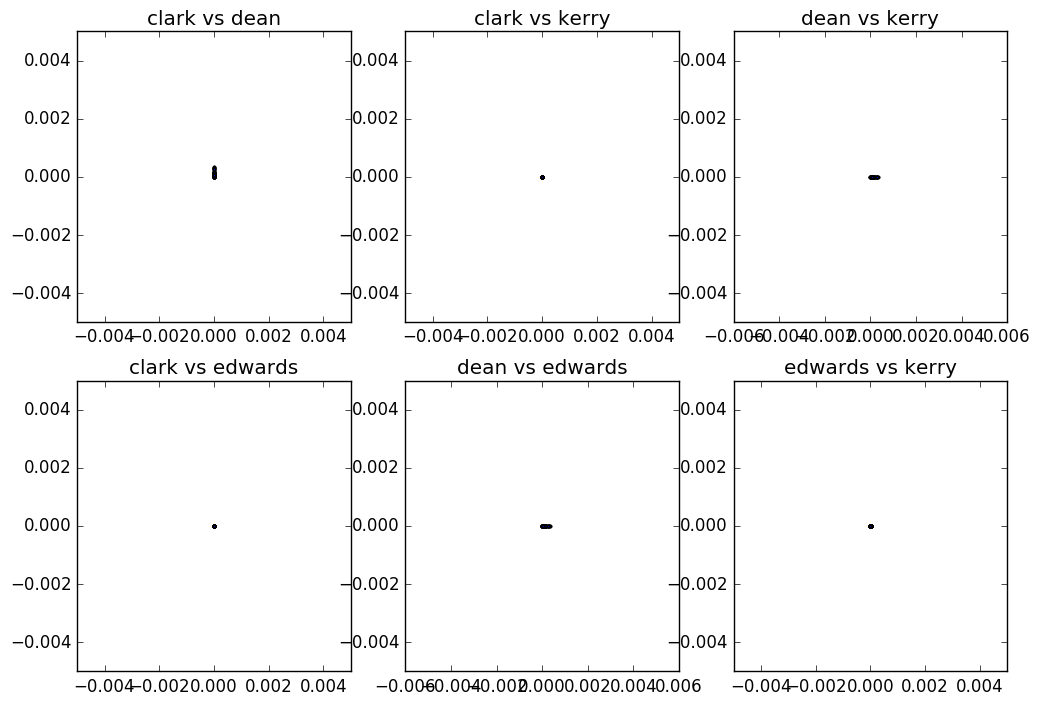

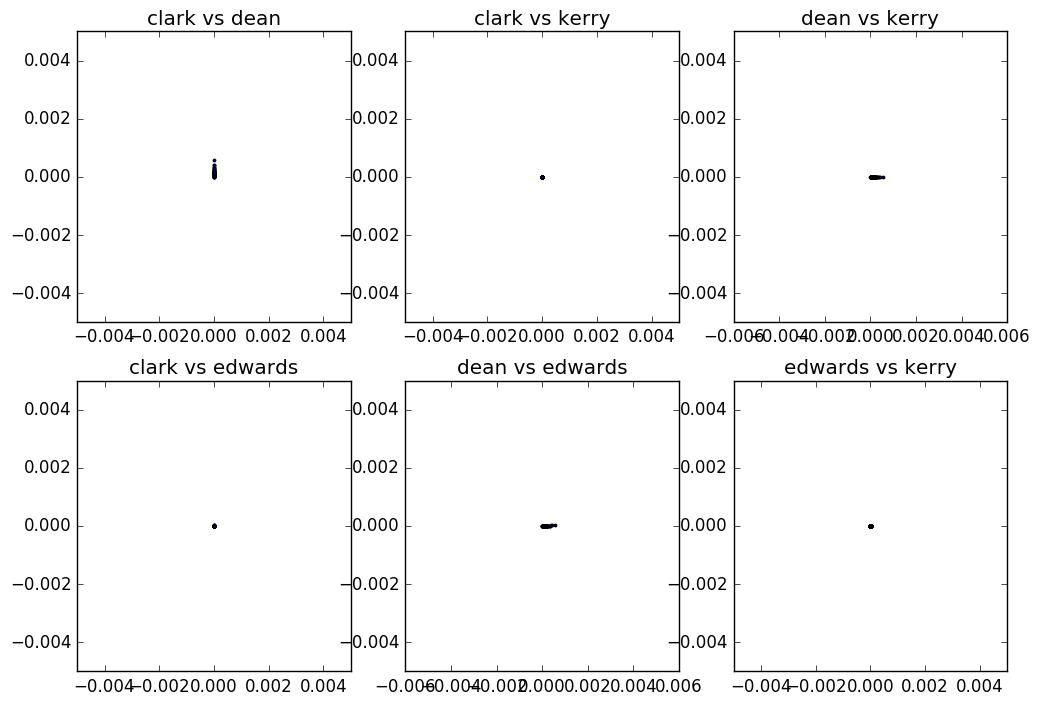

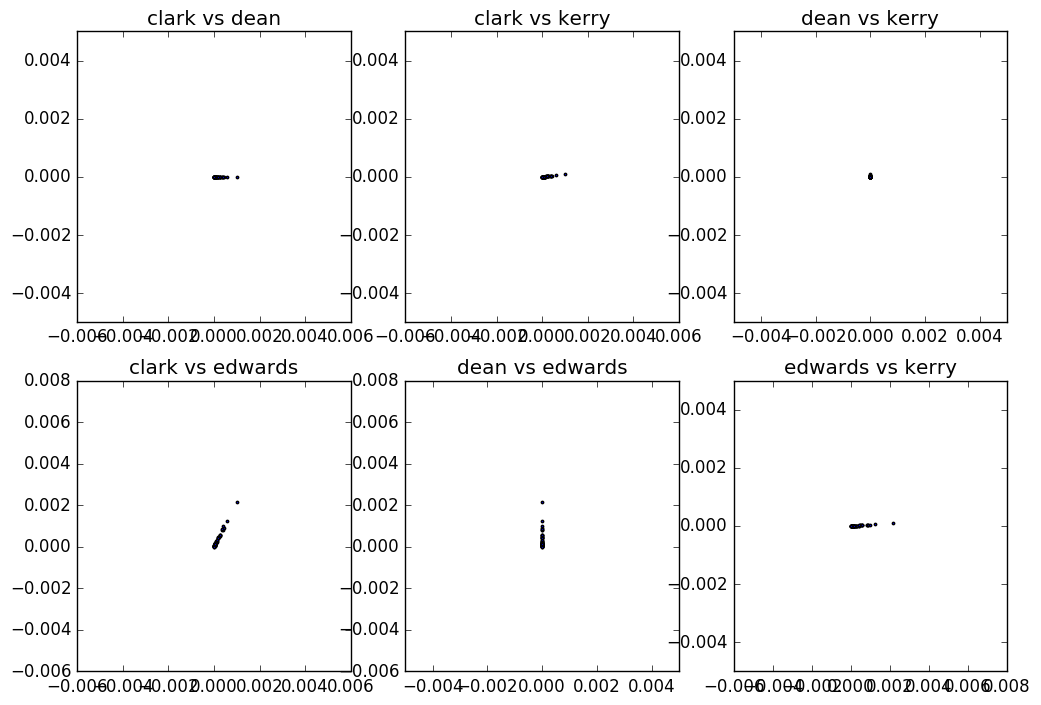

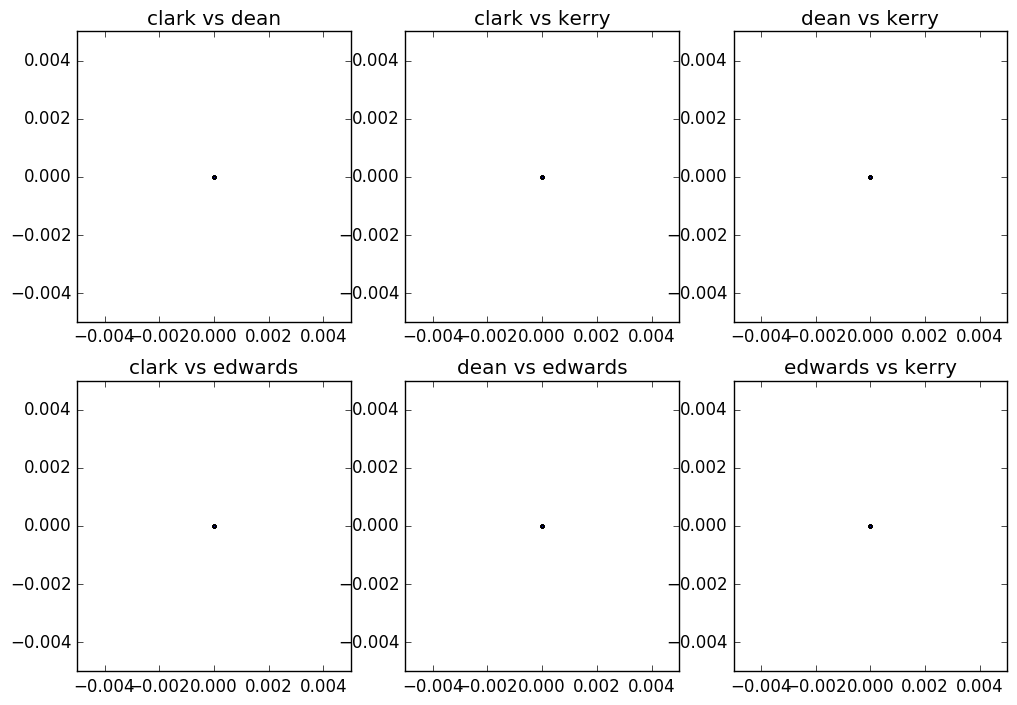

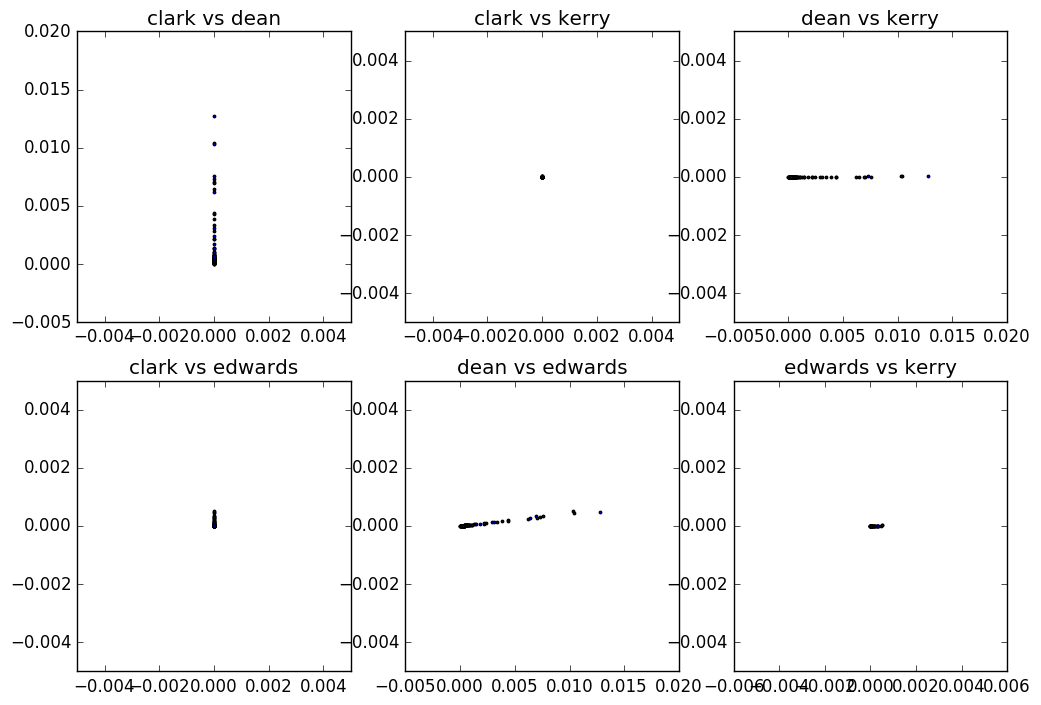

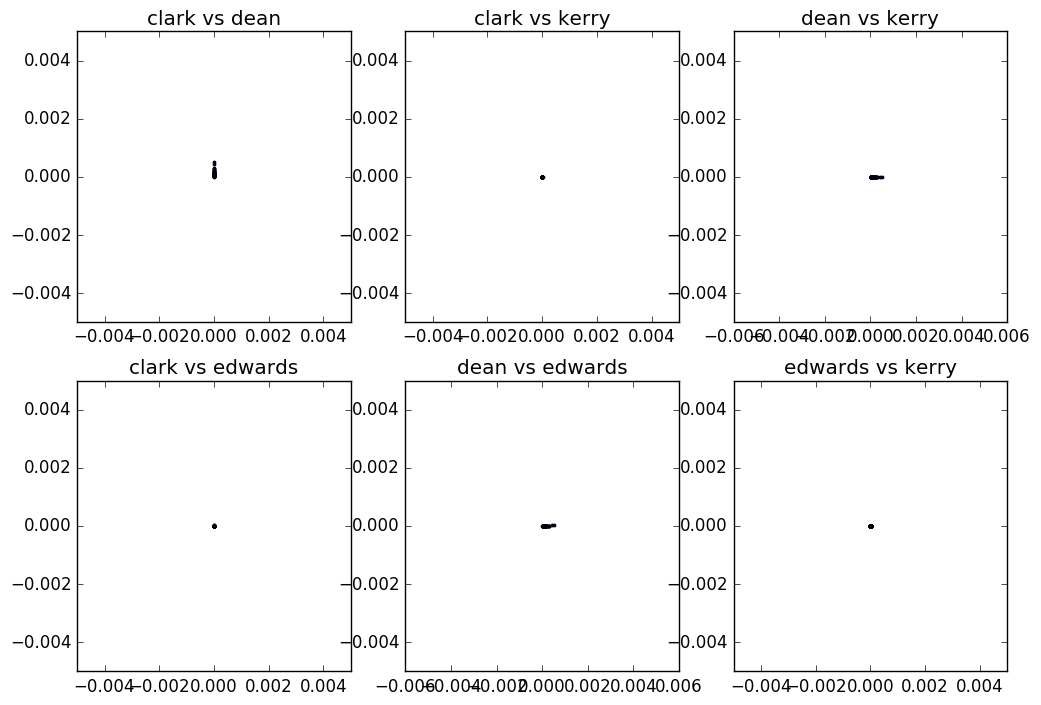

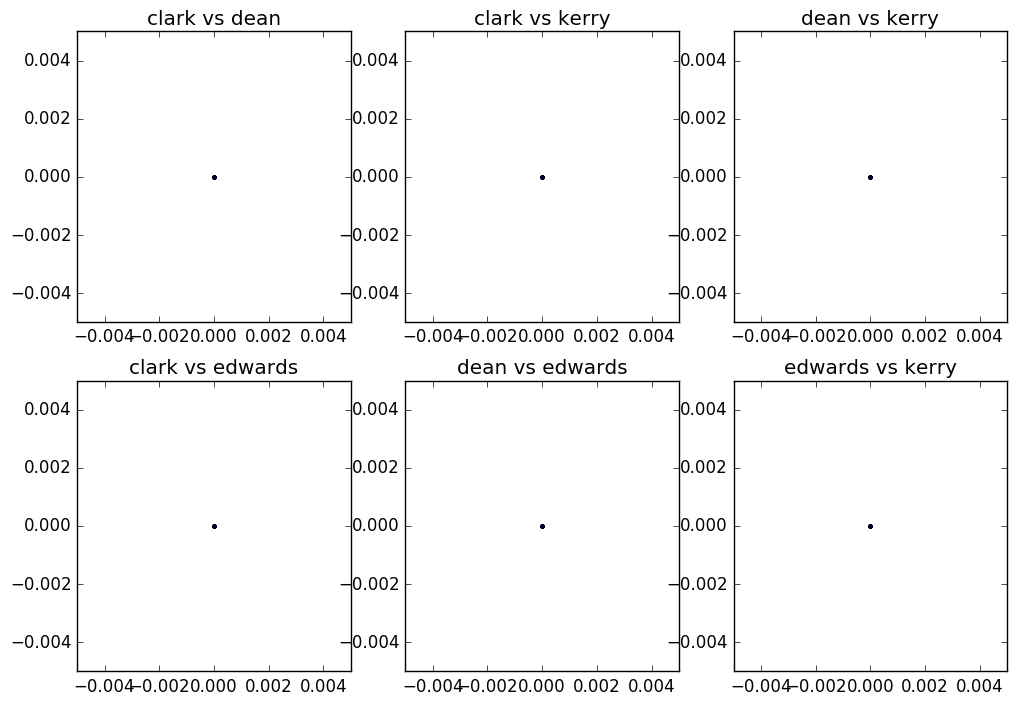

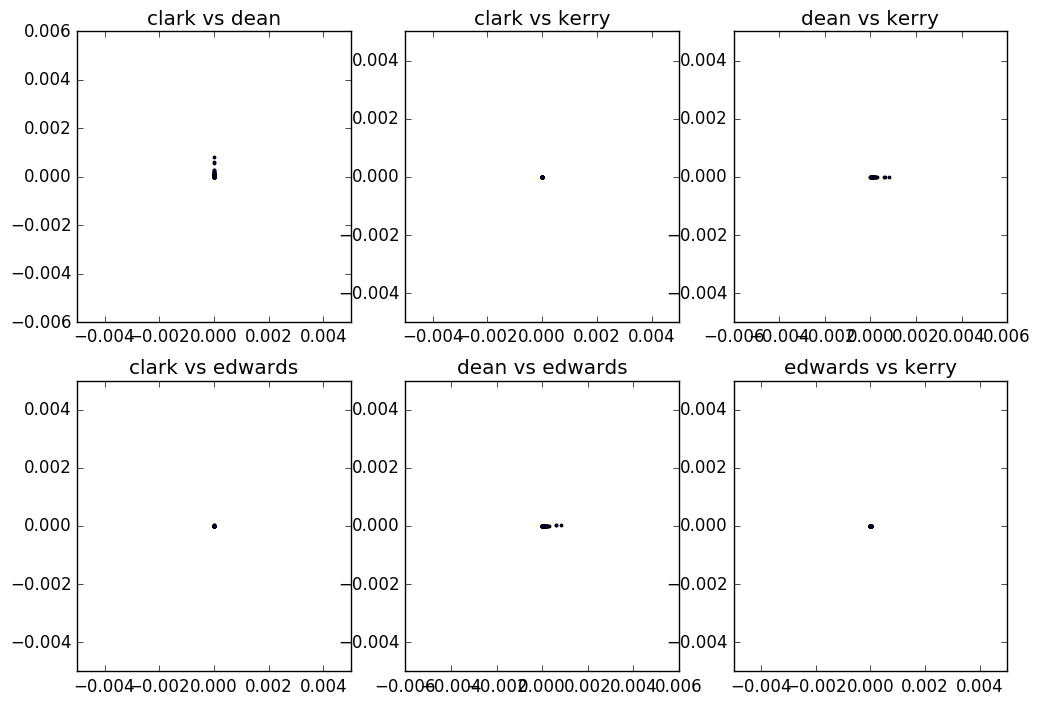

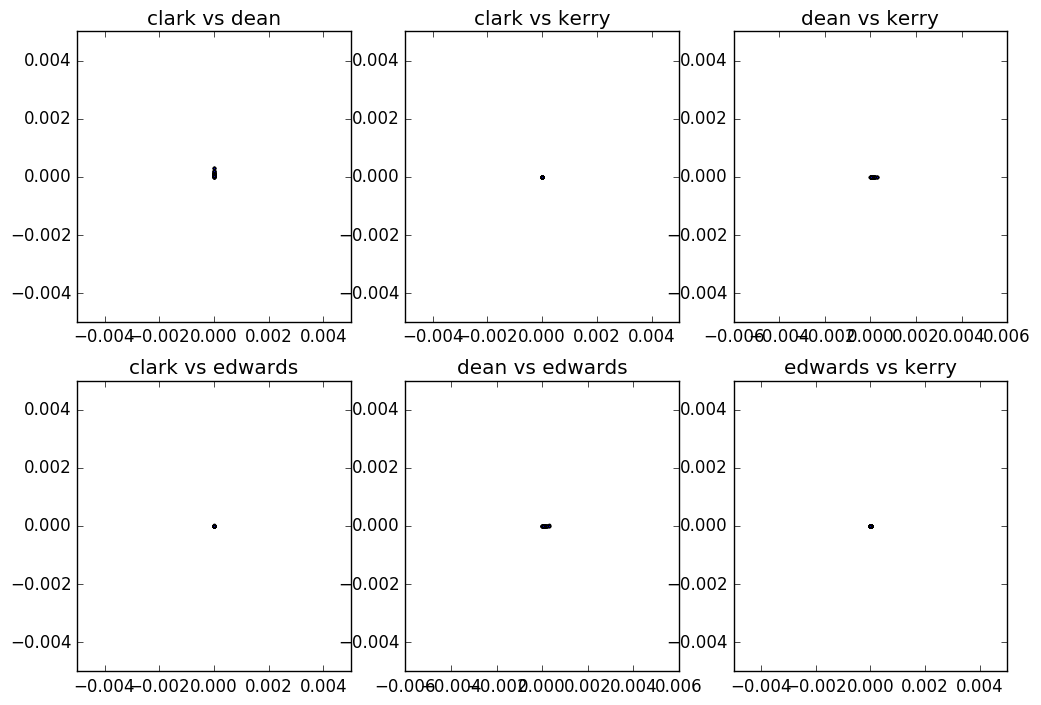

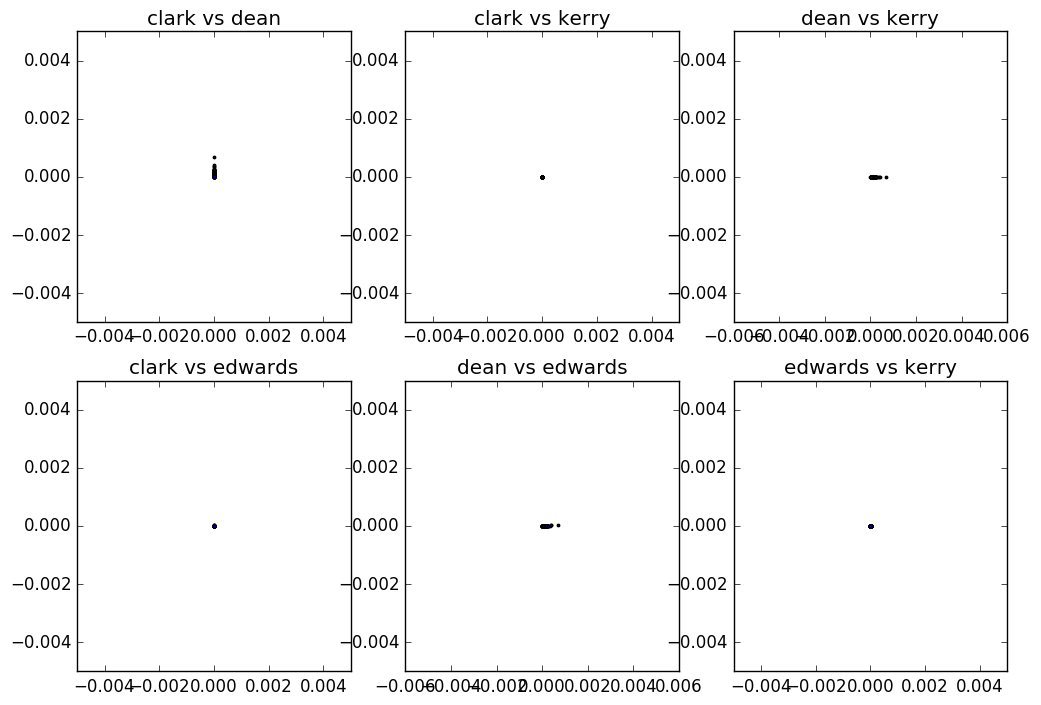

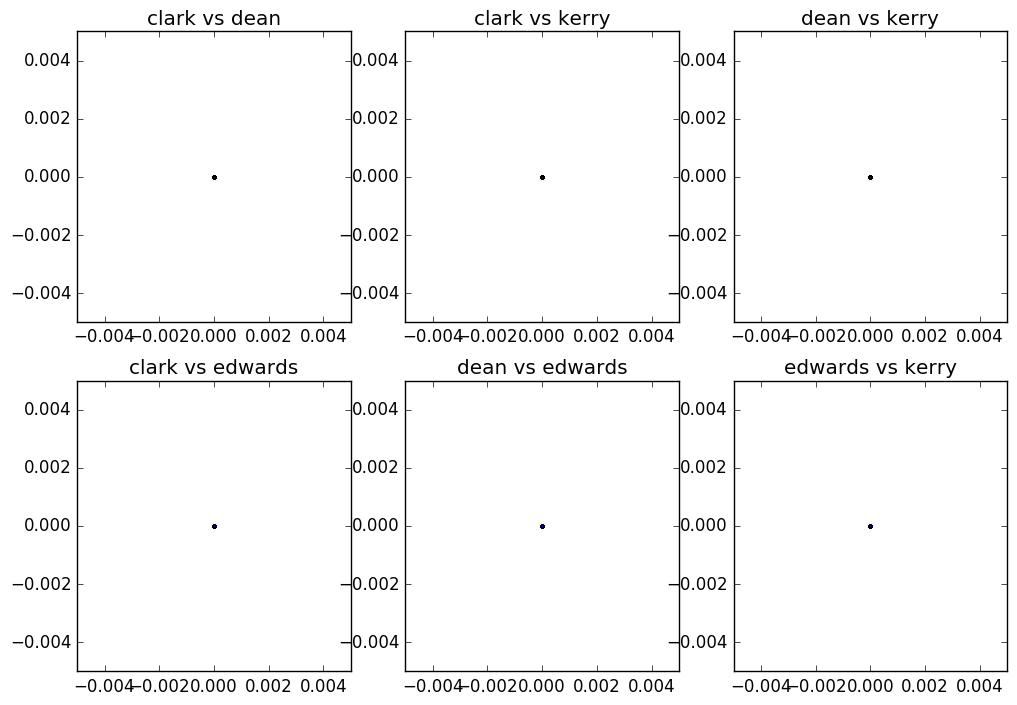

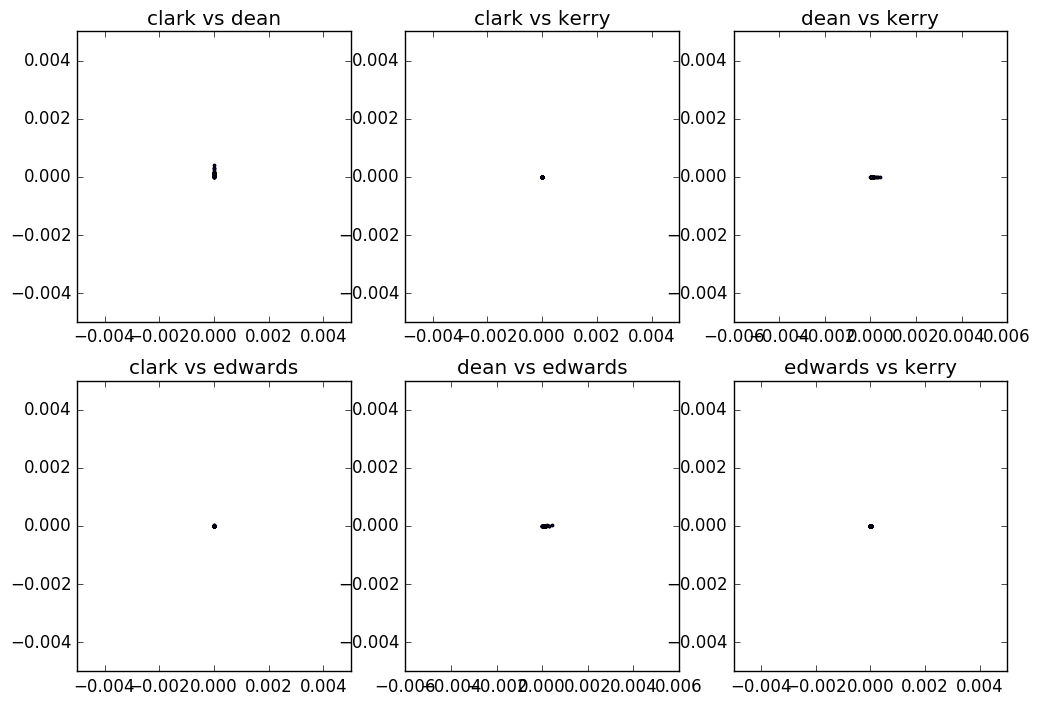

In [35]:
# 良さげな州を選ぶ
# パラメータセット
srand(12345)
para1 = rand(273)
m = simulation(para1)
v = simulate(m)
candcand(m, 0, v)

S = 19が比較的良さそう

candidate1 : "clark"

candidate2 : "dean"

candidate3 : "edwards"

candidate4 : "kerry"

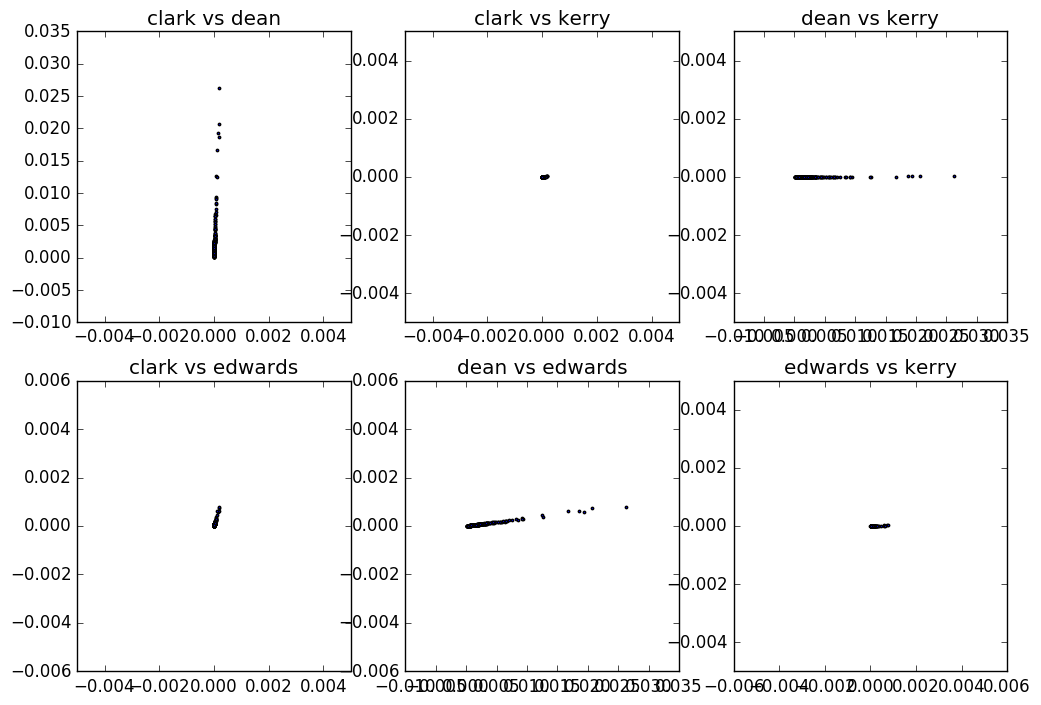

In [40]:
# 基準
A = 19
abs(para1[150:260])[Cand[A, 11]:Cand[A, 12],1]
candcand(m, A, v)

In [43]:
# Tijをいじる
srand(12345)
para2 = rand(273)

# candidate1 vs candidate2を大きくする
# 二重にindexを参照すると代入できないから気をつけてね
para2[149+Cand[A, 11], 1] = 0.9999
abs(para2[150:260])[Cand[A, 11]:Cand[A, 12],1]

6-element Array{Float64,1}:
 0.9999   
 0.651084 
 0.289488 
 0.39906  
 0.269784 
 0.0703054

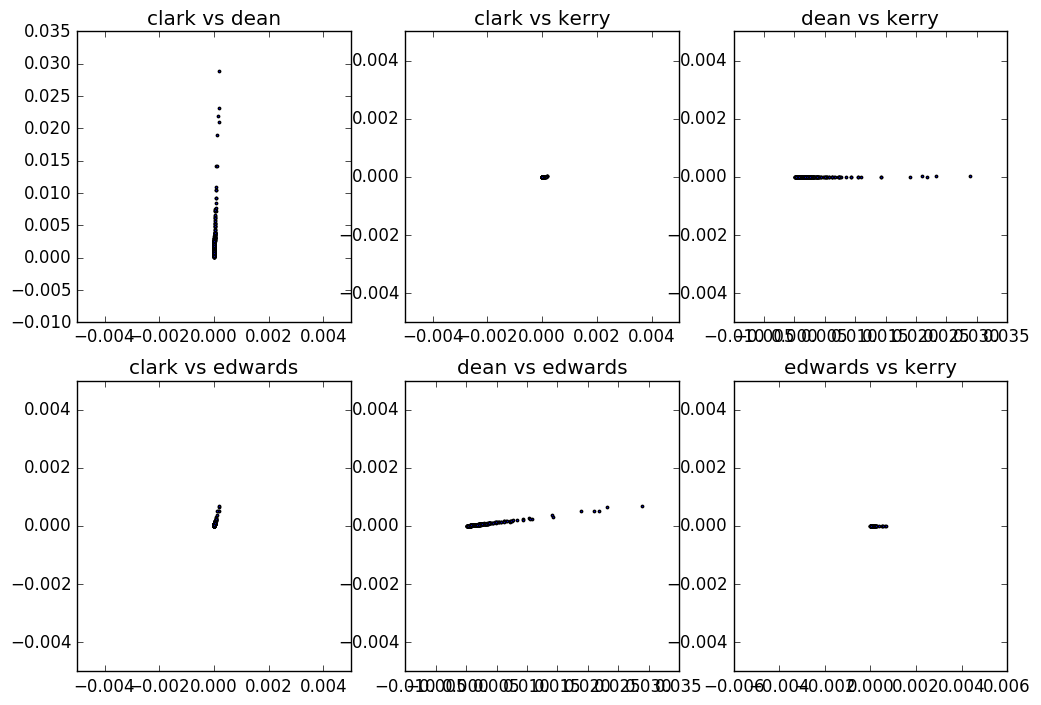

In [44]:
# パラメータをいじったのちの結果
# plotじゃあわかりにくい
m2 = simulation(para2)
v2 = simulate(m2)
candcand(m2, A, v2)

In [51]:
# 各候補のmunicipality別の変化
# 要するにdeanのみ上昇した。
v2[Cand[A, 14]:Cand[A, 15], :] - v[Cand[A, 14]:Cand[A, 15], :]

243×4 Array{Float64,2}:
 -0.000134198  0.0950827  -0.00338049  -0.000221961
 -0.000146521  0.0952574  -0.00332392  -0.000227641
 -0.000176531  0.112209   -0.00380217  -0.000297549
 -0.000140317  0.0990471  -0.00318899  -0.000246383
 -0.000107952  0.0749609  -0.00276514  -0.000255738
 -0.000170518  0.108608   -0.0044259   -0.000323404
 -0.000172431  0.0883763  -0.00372834  -0.000253196
 -0.000178756  0.0805853  -0.00273067  -0.000250934
 -0.000165937  0.104266   -0.00325867  -0.000263087
 -0.000125365  0.0908383  -0.0033949   -0.000213333
 -0.00015662   0.104945   -0.00406694  -0.000294793
 -0.000114982  0.0977437  -0.00374699  -0.000233781
 -0.000156784  0.107564   -0.00367191  -0.000285934
  ⋮                                                
 -0.000119047  0.0998098  -0.00371606  -0.000209607
 -0.000128549  0.0863487  -0.0032481   -0.000232915
 -0.00020895   0.123641   -0.00477473  -0.000371279
 -0.000172565  0.105883   -0.00437529  -0.000295562
 -0.000178129  0.112872   -0.00472957  -

「S = 19において、T_1_2を大きくすると、candidate2のみ得票率が上昇する」は正しい動きか？

→vstrを見る